<a href="https://colab.research.google.com/github/DANCAR1969/programacion/blob/master/REDNEURONAL_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Red Neuronal Recurrente (RNN)**

**Las Redes Neuronales Recurrentes (RNN)**
se utilizan para procesar datos secuenciales o dependientes del tiempo, como:

Aplicación	Ejemplo
Texto	Generación de texto, traducción automática, corrección ortográfica

Audio	Reconocimiento de voz

Tiempo	Predicción de temperatura, precios, sensores, series financieras

Video	Análisis de secuencias cuadro a cuadro

IoT	Detección de anomalías en sensores o equipos industriales

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 1.0702 - val_loss: 0.4680
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4192 - val_loss: 0.1350
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1098 - val_loss: 0.0363
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0364 - val_loss: 0.0299
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0242 - val_loss: 0.0216
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0235 - val_loss: 0.0194
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0199 - val_loss: 0.0190
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0216 - val_loss: 0.0186
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0222 - val_loss: 0.0172
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0180 - val_loss: 0.0187
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0195 - val_loss: 0.0169
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0

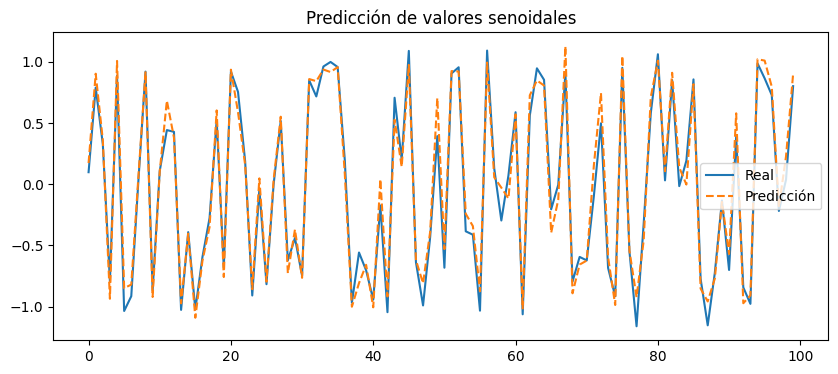

In [ ]:
# Paso 1: Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Paso 2: Generar datos de una función senoidal como serie temporal
def generar_secuencia(timesteps=50, muestras=1000):
    X = []
    y = []
    for i in range(muestras):
        fase = np.random.rand() * 2 * np.pi
        ruido = np.random.normal(scale=0.1, size=timesteps)
        secuencia = np.sin(np.linspace(fase, fase + 3*np.pi, timesteps)) + ruido
        X.append(secuencia[:-1])
        y.append(secuencia[-1])
    return np.array(X), np.array(y)

X, y = generar_secuencia()

# Paso 3: Preparar los datos para la RNN (reshape 3D)
X = X.reshape((X.shape[0], X.shape[1], 1))  # (muestras, pasos, características)

# Paso 4: Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 5: Definir el modelo con SimpleRNN
model = Sequential([
    SimpleRNN(units=16, activation='tanh', input_shape=(X.shape[1], 1)),
    Dense(1)
])

# Paso 6: Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Paso 7: Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

# Paso 8: Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f"\nPérdida (MSE) en test: {loss:.4f}")

# Paso 9: Visualizar predicciones
y_pred = model.predict(X_test[:100])

plt.figure(figsize=(10, 4))
plt.plot(y_test[:100], label='Real')
plt.plot(y_pred, label='Predicción', linestyle='dashed')
plt.title("Predicción de valores senoidales")
plt.legend()
plt.show()
